In [44]:
import pandas as pd

In [45]:
#UTF-8이 가장 흔하게 쓰이는 인코딩. 그래서 encoding = '' 부분을 생략하면 UTF-8로 인코딩하는 것.
#cp949는 windows에서 쓰이는 한글 코드셋입니다. 일명 확장완성형 (UHC)이라고 하죠.
#euc-kr은 확장유닉스 코드입니다. 그외 iso-2022-kr도 있는데 표현가능한 코드영역이 약간씩 다르다고 합니다.
#https://kldp.org/node/18838 cp949설명
#https://velog.io/@gggggeun1/Colab%EC%97%90%EC%84%9C-%ED%8C%8C%EC%9D%BC-%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0-%EB%B0%8F-%ED%8C%8C%EC%9D%BC-%EC%84%A4%EC%A0%95
profiles_df = pd.read_csv('ML_data_profiles.csv', encoding='CP949')
streams_df = pd.read_csv('ML_data_streams_trng.csv', encoding='CP949')

In [46]:
streams_df

,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
0,1,2012073111,news.naver.com,1,38,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스
1,1,2013053001,www.naver.com,3,0,네이버,인터넷/컴퓨터,포털,종합포털
2,1,2013052900,www.naver.com,1,0,네이버,인터넷/컴퓨터,포털,종합포털
3,1,2012071102,krdic.naver.com,1,60,네이버 사전,온라인교육,학술정보,포털사전
4,1,2012101203,www.naver.com,2,30,네이버,인터넷/컴퓨터,포털,종합포털
...,...,...,...,...,...,...,...,...,...
99995,1321,2013042319,www.netmarble.net,12,294,넷마블,게임,게임포털,게임포털
99996,1321,2012072409,media.daum.net,3,0,미디어다음,뉴스/미디어,인터넷신문,포털뉴스
99997,1321,2013021206,search.naver.com,1,0,네이버 검색,인터넷/컴퓨터,검색,포털검색
99998,1321,2013020619,www.netmarble.net,2,95,넷마블,게임,게임포털,게임포털


In [47]:
profiles_df.loc[profiles_df["GENDER"]=="남자"]
profiles_df.loc[profiles_df["GENDER"]=="여자"]
profiles_df.loc[(profiles_df["GENDER"]=="남자") & (profiles_df["RESIDENCE"]=="충청")]
#https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=bosongmoon&logNo=221572727121 특정 속성값이 있는 행만 추출

,CUS_ID,GENDER,AGE,RESIDENCE,GROUP
0,1,남자,40,충청,M40+
57,105,남자,40,충청,M40+
84,1074,남자,40,충청,M40+
101,109,남자,30,충청,M30
122,1108,남자,40,충청,M40+
...,...,...,...,...,...
1802,370,남자,20,충청,M20-
1808,376,남자,50,충청,M40+
1847,410,남자,40,충청,M40+
1873,434,남자,50,충청,M40+


In [1]:
result_df = pd.merge(profiles_df, streams_df, on='CUS_ID', how='left')
#https://engineer-mole.tistory.com/208
result_df

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


NameError: name 'profiles_df' is not defined

In [49]:
print(result_df.isna)

<bound method DataFrame.isna of        CUS_ID GENDER  AGE RESIDENCE GROUP     TIME_ID                SITE  \
0           1     남자   40        충청  M40+  2012073111      news.naver.com   
1           1     남자   40        충청  M40+  2013053001       www.naver.com   
2           1     남자   40        충청  M40+  2013052900       www.naver.com   
3           1     남자   40        충청  M40+  2012071102     krdic.naver.com   
4           1     남자   40        충청  M40+  2012101203       www.naver.com   
...       ...    ...  ...       ...   ...         ...                 ...   
99995     548     여자   30        부산   F30  2012071117  shopping.naver.com   
99996     548     여자   30        부산   F30  2012100717        jr.naver.com   
99997     548     여자   30        부산   F30  2013012716       www.naver.com   
99998     548     여자   30        부산   F30  2013041313      blog.naver.com   
99999     548     여자   30        부산   F30  2013052215   www.hometax.go.kr   

       SITE_CNT  ST_TIME   SITE_NM  BACT_NM

In [50]:
#특성 추출: 원시 데이터에서 핵심 특성을 추출하는 과정. 가공한 토큰들을 컴퓨터가 이해할 수 있는 벡터 데이터로 바꾸는 과정
"""
  Bag of Words
    - 문서 내 모든 단어들(토큰)을 가방 하나에 모두 집어넣고 사용.
    - 자주 언급된 단어일수록 가바에서 나올 확률이 높아진다. 
    - 중요한 것은 단어의 등장 빈도이며, 단어의 순서는 상관없음
  okt.morphs()
  -텍스트를 형태소 단위로 나눈다. 옵션으로는 norm과 stem이 있다.
  -norm은 normalize의 약자로 문장을 정규화하는 역할
  -stem은 각 단어에서 어간을 추출하는 기능
"""

# !pip install --target=$my_path konlpy
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

result = result_df["BACT_NM"]
okt = Okt() #객체 생성
#result = result.apply(okt.morphs)#형태소로 분리
result


0         뉴스/미디어
1        인터넷/컴퓨터
2        인터넷/컴퓨터
3          온라인교육
4        인터넷/컴퓨터
          ...   
99995         쇼핑
99996       커뮤니티
99997    인터넷/컴퓨터
99998       커뮤니티
99999      정치/행정
Name: BACT_NM, Length: 100000, dtype: object

In [51]:
re = result_df["BACT_NM"]
print(re.values) #명사로 분리할 땐 배열화 시켜줘야해서 values로 배열화
re = re.apply(okt.nouns) #명사로 분리
re

['뉴스/미디어' '인터넷/컴퓨터' '인터넷/컴퓨터' ... '인터넷/컴퓨터' '커뮤니티' '정치/행정']


0         [뉴스, 미디어]
1        [인터넷, 컴퓨터]
2        [인터넷, 컴퓨터]
3           [온라인교육]
4        [인터넷, 컴퓨터]
            ...    
99995          [쇼핑]
99996        [커뮤니티]
99997    [인터넷, 컴퓨터]
99998        [커뮤니티]
99999      [정치, 행정]
Name: BACT_NM, Length: 100000, dtype: object

In [52]:
#https://python-explorer.tistory.com/30
counter= Counter()
for i in range(100000):
  counter += Counter(re[i])
counter
top5 = counter.most_common(5)

In [53]:
print(top5)

[('인터넷', 49690), ('컴퓨터', 49690), ('뉴스', 13367), ('미디어', 13367), ('쇼핑', 11938)]


In [54]:
print(counter)

Counter({'인터넷': 49690, '컴퓨터': 49690, '뉴스': 13367, '미디어': 13367, '쇼핑': 11938, '커뮤니티': 10514, '금융': 3707, '부동산': 3707, '엔터테인먼트': 2300, '게임': 1986, '정치': 1038, '행정': 1038, '비즈니스': 937, '경제': 937, '온라인교육': 846, '정보': 676, '통신': 676, '서비스': 541, '여행': 425, '생활': 409, '가정': 409, '취미': 409, '교육': 400, '학원': 400, '유통': 331, '판매': 331, '운송': 331, '제조': 267, '건강': 207, '의학': 207, '스포츠': 179, '레저': 179, '사회': 161, '문화': 161, '종교': 161, '문학': 44, '예술': 44, '학문': 37})


In [55]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%config InlinBackend.figure_format = 'retina'

sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)
# plt.rc('font', family=font_name)
# fm._rebuild() #여기까지는 한국어 나올 수 있게 설정해주는 명령어
# plt.title("안뇽")

In [56]:
import wordcloud

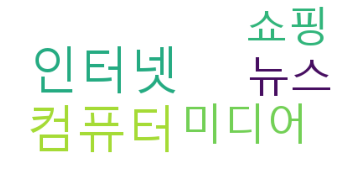

In [57]:
#https://pinkwink.kr/1324

import nltk
from wordcloud import WordCloud
from  konlpy.corpus import kobill
top5
path = 'C:/Windows/Fonts/malgun.ttf'
wc = WordCloud(font_path = path, relative_scaling=0.2,
                 background_color="white").generate_from_frequencies(dict(top5))
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

In [58]:
test = result_df.loc[(result_df["GENDER"]=="남자")&(result_df["RESIDENCE"]=="경상")&(result_df["AGE"]==20)]  

In [59]:
test

,CUS_ID,GENDER,AGE,RESIDENCE,GROUP,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
6650,1118,남자,20,경상,M20-,2013021202,www.koreatimes.co.kr,1,2,The Korea Times,뉴스/미디어,전문뉴스,외국신문/잡지
6651,1118,남자,20,경상,M20-,2013030615,www.naver.com,1,1,네이버,인터넷/컴퓨터,포털,종합포털
6652,1118,남자,20,경상,M20-,2013020412,cafe.naver.com,1,3,네이버 카페,커뮤니티,커뮤니티포털,포털커뮤니티
6653,1118,남자,20,경상,M20-,2013010520,kart.nexon.com,3,0,크레이지레이싱 카트라이더,게임,온라인게임,스포츠/레이싱
6654,1118,남자,20,경상,M20-,2013022210,wf.nexon.com,1,4,넥슨 워페이스,게임,온라인게임,액션/슈팅
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85995,296,남자,20,경상,M20-,2012072010,www.down-load.co.kr,3,191,다운로드,인터넷/컴퓨터,다운로드,자료실
85996,296,남자,20,경상,M20-,2012110421,www.daum.net,3,45,다음,인터넷/컴퓨터,포털,종합포털
85997,296,남자,20,경상,M20-,2012110816,www.daum.net,1,12,다음,인터넷/컴퓨터,포털,종합포털
85998,296,남자,20,경상,M20-,2013010102,www.artsnews.co.kr,1,0,아츠뉴스,뉴스/미디어,전문뉴스,연예/오락전문지


In [60]:
test['BACT_NM'].value_counts(normalize=True)

인터넷/컴퓨터     0.515556
뉴스/미디어      0.133333
커뮤니티        0.131111
쇼핑          0.093333
게임          0.046667
엔터테인먼트      0.033333
금융/부동산      0.011111
정보통신/IT     0.008889
비즈니스/경제     0.006667
서비스         0.006667
스포츠/레저      0.004444
생활/가정/취미    0.004444
여행          0.002222
교육/학원       0.002222
Name: BACT_NM, dtype: float64

In [61]:
test1 = test.loc[(test["BACT_NM"]=="인터넷/컴퓨터")|(test["BACT_NM"]=="뉴스/미디어")|(test["BACT_NM"]=='커뮤니티')|(test["BACT_NM"]=='쇼핑')|(test["BACT_NM"]=='게임')]

In [62]:
test1

,CUS_ID,GENDER,AGE,RESIDENCE,GROUP,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM
6650,1118,남자,20,경상,M20-,2013021202,www.koreatimes.co.kr,1,2,The Korea Times,뉴스/미디어,전문뉴스,외국신문/잡지
6651,1118,남자,20,경상,M20-,2013030615,www.naver.com,1,1,네이버,인터넷/컴퓨터,포털,종합포털
6652,1118,남자,20,경상,M20-,2013020412,cafe.naver.com,1,3,네이버 카페,커뮤니티,커뮤니티포털,포털커뮤니티
6653,1118,남자,20,경상,M20-,2013010520,kart.nexon.com,3,0,크레이지레이싱 카트라이더,게임,온라인게임,스포츠/레이싱
6654,1118,남자,20,경상,M20-,2013022210,wf.nexon.com,1,4,넥슨 워페이스,게임,온라인게임,액션/슈팅
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85995,296,남자,20,경상,M20-,2012072010,www.down-load.co.kr,3,191,다운로드,인터넷/컴퓨터,다운로드,자료실
85996,296,남자,20,경상,M20-,2012110421,www.daum.net,3,45,다음,인터넷/컴퓨터,포털,종합포털
85997,296,남자,20,경상,M20-,2012110816,www.daum.net,1,12,다음,인터넷/컴퓨터,포털,종합포털
85998,296,남자,20,경상,M20-,2013010102,www.artsnews.co.kr,1,0,아츠뉴스,뉴스/미디어,전문뉴스,연예/오락전문지


In [63]:
map_test = {"인터넷/컴퓨터":1,"뉴스/미디어":2,"커뮤니티":3,"쇼핑":4,"게임":5}

In [64]:
test1["TEST_NM"]=test1["BACT_NM"].map(map_test)

C:\Users\user\AppData\Local\Temp/ipykernel_13260/1296347501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["TEST_NM"]=test1["BACT_NM"].map(map_test)


In [65]:
test1

,CUS_ID,GENDER,AGE,RESIDENCE,GROUP,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,TEST_NM
6650,1118,남자,20,경상,M20-,2013021202,www.koreatimes.co.kr,1,2,The Korea Times,뉴스/미디어,전문뉴스,외국신문/잡지,2
6651,1118,남자,20,경상,M20-,2013030615,www.naver.com,1,1,네이버,인터넷/컴퓨터,포털,종합포털,1
6652,1118,남자,20,경상,M20-,2013020412,cafe.naver.com,1,3,네이버 카페,커뮤니티,커뮤니티포털,포털커뮤니티,3
6653,1118,남자,20,경상,M20-,2013010520,kart.nexon.com,3,0,크레이지레이싱 카트라이더,게임,온라인게임,스포츠/레이싱,5
6654,1118,남자,20,경상,M20-,2013022210,wf.nexon.com,1,4,넥슨 워페이스,게임,온라인게임,액션/슈팅,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85995,296,남자,20,경상,M20-,2012072010,www.down-load.co.kr,3,191,다운로드,인터넷/컴퓨터,다운로드,자료실,1
85996,296,남자,20,경상,M20-,2012110421,www.daum.net,3,45,다음,인터넷/컴퓨터,포털,종합포털,1
85997,296,남자,20,경상,M20-,2012110816,www.daum.net,1,12,다음,인터넷/컴퓨터,포털,종합포털,1
85998,296,남자,20,경상,M20-,2013010102,www.artsnews.co.kr,1,0,아츠뉴스,뉴스/미디어,전문뉴스,연예/오락전문지,2


In [66]:
test2 = test1[["CUS_ID","ST_TIME","TEST_NM"]]

In [67]:
test2

,CUS_ID,ST_TIME,TEST_NM
6650,1118,2,2
6651,1118,1,1
6652,1118,3,3
6653,1118,0,5
6654,1118,4,5
...,...,...,...
85995,296,191,1
85996,296,45,1
85997,296,12,1
85998,296,0,2


In [68]:
import sklearn

In [69]:
from sklearn.preprocessing import StandardScaler  #표준화

In [70]:
x=test2.drop(["CUS_ID"],axis=1)   #독립변인의 value값만 추출함

In [71]:
y=test2['CUS_ID'].values #  

In [72]:
x = StandardScaler().fit_transform(x) #x객체에 x를 표준화한 데이터를 저장
features = ["ST_TIME","TEST_NM"]

In [73]:
from sklearn.decomposition import PCA

In [74]:
pd.DataFrame(x,columns=features).head()

,ST_TIME,TEST_NM
0,-0.452010,0.050261
1,-0.455427,-0.750053
2,-0.448593,0.850575
3,-0.458843,2.451204
4,-0.445177,2.451204


In [75]:
from sklearn.decomposition import PCA

In [76]:
pca=PCA(n_components=2)

In [77]:
printcipalComponents = pca.fit_transform(x)

In [78]:
principalDf = pd.DataFrame(data=printcipalComponents, columns = ["principal component1","principal components2"])

In [79]:
principalDf.head()

,principal component1,principal components2
0,-0.284079,-0.355159
1,-0.852403,0.208332
2,0.284244,-0.918651
3,1.408812,-2.057714
4,1.418476,-2.048050


In [80]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from gensim.models import KeyedVectors


In [81]:
mpl.rcParams['axes.unicode_minus'] = False    #그래프에서 마이너스 코드 깨지는거 방지
plt.rc('font', family='D2Coding')

In [82]:
def show_tsne():
  tsne = TSNE(n_components=2)
  X = tsne.fit_transform(principalDf)

In [83]:
# 3차원 t-SNE 임베딩.
tsne_np = TSNE(n_components = 3).fit_transform(principalDf)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 1', 'component 2','component 3'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [84]:
print(tsne_df)

     component 1  component 2  component 3
0     -56.038857    20.183956    94.928650
1      78.012283    24.946482    79.616043
2     102.880615   -43.189697    21.139992
3      -6.723520   125.431885    17.896809
4       2.887237   105.216423    17.941736
..           ...          ...          ...
409   -25.477970   -72.952881    56.190010
410   -11.867987  -105.752884   -38.375290
411   -90.743881   -22.885832   -22.269133
412   -57.280746    86.274429    42.960732
413    -2.218616    73.309715   -51.904320

[414 rows x 3 columns]


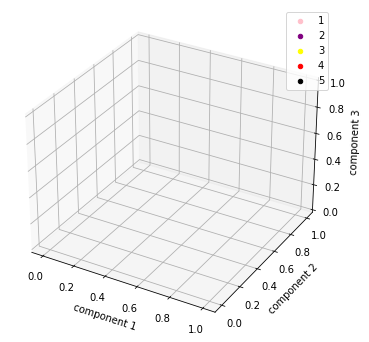

In [85]:
# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

#  정보 불러오기 
tsne_df['CUS_ID'] = test1['CUS_ID']

# 분리
tsne_df_0 = tsne_df[tsne_df['CUS_ID'] == 0]
tsne_df_1 = tsne_df[tsne_df['CUS_ID'] == 1]
tsne_df_2 = tsne_df[tsne_df['CUS_ID'] == 2]
tsne_df_3 = tsne_df[tsne_df['CUS_ID'] == 3]
tsne_df_4 = tsne_df[tsne_df['CUS_ID'] == 4]
# 시각화
ax.scatter(tsne_df_0['component 1'], tsne_df_0['component 2'], tsne_df_0['component 3'], color = 'pink', label = '1')
ax.scatter(tsne_df_1['component 1'], tsne_df_1['component 2'], tsne_df_1['component 3'], color = 'purple', label = '2')
ax.scatter(tsne_df_2['component 1'], tsne_df_2['component 2'], tsne_df_2['component 3'], color = 'yellow', label = '3')
ax.scatter(tsne_df_3['component 1'], tsne_df_3['component 2'], tsne_df_3['component 3'], color = 'red', label = '4')
ax.scatter(tsne_df_4['component 1'], tsne_df_4['component 2'], tsne_df_4['component 3'], color = 'black', label = '5')

ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.legend()
plt.show()

In [43]:

#https://hleecaster.com/python-pandas-selecting-data/


# 새 섹션